In [11]:
import xgboost as xgb
import pandas as pd # analysis
import numpy as np # calculation
from pandas import Series, DataFrame
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

In [12]:
# read data set
data = pd.read_csv('data.csv') # read training data
data = data.iloc[:,1:]
data.head()

日收益率_Dret  滞后一期收益  市盈率_PE  市净率_PB  市销率_PS  每股收益(摊薄)(元/股)_EPS  \
0     0.0114 -0.0290    9.11    2.38    2.06               1.89   
1    -0.0290  0.0063    9.38    2.38    2.06               1.89   
2     0.0063  0.0280    9.32    2.38    2.06               1.89   
3     0.0280 -0.0225    9.07    2.38    2.06               1.89   
4    -0.0225  0.0349    9.27    2.38    2.06               1.89   

   净资产收益率(摊薄)_ROE  每股营业利润(元/股)_OpPrfPS  每股净资产(元/股)_NAPS  每股营业收入_IncomePS  
0         33.4965                 2.59             5.65             5.63  
1         33.4965                 2.59             5.65             5.63  
2         33.4965                 2.59             5.65             5.63  
3         33.4965                 2.59             5.65             5.63  
4         33.4965                 2.59             5.65             5.63

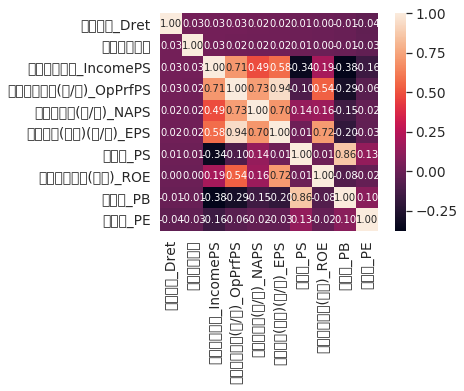

In [13]:
# pick features that are most relevant
import seaborn as sns
k = 10
cols = data.corr().nlargest(k, '日收益率_Dret')['日收益率_Dret'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot=True, square=True, fmt='.2f',annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)


In [14]:
data = data[['滞后一期收益', '市盈率_PE', '市净率_PB', '市销率_PS', '每股收益(摊薄)(元/股)_EPS', '每股营业利润(元/股)_OpPrfPS', '每股净资产(元/股)_NAPS', '每股营业收入_IncomePS']]

In [15]:
# split into training set and test set
# data.rename("")
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.33)


In [16]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.65,
#                 max_depth = 6, alpha = 10, n_estimators = 10)
# xg_reg.fit(X_train,y_train)

# y_pred = xg_reg.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("RMSE: %f" % (rmse))

In [17]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.001, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.6f" % mse)

from sklearn.metrics import mean_absolute_error
me = mean_absolute_error(y_test, y_pred)
print('me: ', me)

MSE: 0.000509
me:  0.01577416311325885


In [18]:
d = {'y': y_test, 'y_pred': y_pred, 'diff': abs(y_test - y_pred)}
df = pd.DataFrame(data=d)
temp = df[df['diff'] < me]
print('accuracy', (len(temp)/ len(y_test)) * 100)

accuracy 63.09711286089239
